## Data Load

In [196]:
import pandas as pd
pd.set_option('mode.chained_assignment',  None) 

In [197]:
df = pd.read_csv("data/credit_card.csv")

In [198]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [199]:
df = df.drop("CLIENTNUM", axis=1)

In [200]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)


In [201]:
train

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9066,Existing Customer,54,F,1,Unknown,Single,Unknown,Blue,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464
5814,Attrited Customer,58,F,4,High School,Married,Unknown,Blue,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334
792,Existing Customer,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103
1791,Existing Customer,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694
5011,Existing Customer,49,F,2,High School,Married,$40K - $60K,Blue,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Attrited Customer,44,F,1,Graduate,Single,$40K - $60K,Blue,38,3,2,5,4142.0,2517,1625.0,0.809,2104,44,0.833,0.608
5191,Attrited Customer,53,F,3,High School,Divorced,Unknown,Blue,36,4,3,6,7939.0,0,7939.0,0.551,2269,42,0.312,0.000
5390,Existing Customer,42,F,4,Graduate,Unknown,Less than $40K,Blue,32,3,1,2,2314.0,1547,767.0,0.804,4678,74,1.000,0.669
860,Existing Customer,40,M,3,Unknown,Single,$40K - $60K,Blue,28,4,1,1,3563.0,1707,1856.0,0.506,1482,42,0.312,0.479


## Data Encoding

In [202]:
from sklearn import preprocessing

encoders = {}

for col in train.select_dtypes(include = "object"):

    encoders[col] = preprocessing.LabelEncoder()
    train[col] = encoders[col].fit_transform(train[col])


In [203]:
for col in test.select_dtypes(include = "object"):
    test[col] = encoders[col].transform(test[col])



In [204]:
train_X, train_y = train.drop('Attrition_Flag',axis=1), train['Attrition_Flag']
test_X, test_y = test.drop('Attrition_Flag',axis=1), test['Attrition_Flag']

## Training

In [205]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(train_X, train_y)

RandomForestClassifier(max_depth=10, random_state=0)

In [206]:
encoders['Attrition_Flag'].classes_

array(['Attrited Customer', 'Existing Customer'], dtype=object)

## Validation

In [207]:
clf.score(test_X, test_y)

0.9496544916090819

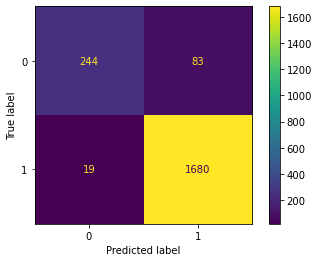

In [208]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, test_X, test_y)  
plt.show()

In [209]:
from sklearn.metrics import classification_report
pred_y = clf.predict(test_X)
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       327
           1       0.95      0.99      0.97      1699

    accuracy                           0.95      2026
   macro avg       0.94      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026

